# Generating higher order dispersion gifs

In [15]:
from ssfm_functions import *
import numpy as np

# Set up time base and input signal

In [16]:
os.chdir(os.path.realpath(os.path.dirname('F:\\GitHub\\Repository\\Nlse\\NLSE-vector-solver')))
    
    
N  = 2**16 #Number of points
dt = 10e-15 #Time resolution [s] 

centerWavelength=1550e-9
centerFreq=wavelengthToFreq(centerWavelength)


timeFreq_test=timeFreq_class(N,dt,centerFreq)

testAmplitude = np.sqrt(1)                    #Amplitude in units of sqrt(W)
testDuration  =1e-11   #Pulse 1/e^2 duration [s]
testOffset    = 0                       #Time offset
testChirp = 0
testCarrierFreq=0
testPulseType='gaussian' 
testOrder = 1
testNoiseAmplitude = 0


testInputSignal = input_signal_class(timeFreq_test, 
                                      testAmplitude ,
                                      testDuration,
                                      testOffset,
                                      testChirp,
                                      testCarrierFreq,
                                      testPulseType,
                                      testOrder,
                                      testNoiseAmplitude)




 ### timeFreq Configuration Parameters ###
  Number of points 		= 65536
  Start time, tmin 		= -327.680ps
  Stop time, tmax 		= 327.680ps
  Time resolution 		= 0.010ps
  
  Center frequency		= 193.414THz
  Start frequency		= -49.999THz
  Stop frequency 		= 49.998THz
  Frequency resolution 		= 1525.856MHz
   
 ### Input Signal Parameters ###
  Pmax 				= 1.000 W
  Duration 			= 10.000 ps
  Time offset 			= 0.000 ps
  Freq offset 			= 0.000 GHz
  Chirp 			= 0.000
  pulseType 			= gaussian
  order 			= 1
  noiseAmplitude 		= 0.000 sqrt(W)
   


# Fiber with only 5th order dispersion

 ### Characteristic parameters of fiber: ###
Fiber Length [km] 	= 1.0 
Number of Steps 	= 256 
dz [m] 	= 3.90625 
Fiber gamma [1/W/m] 	= 0 
Fiber beta2 [s^2/m] 	= 0
Fiber beta3 [s^3/m] 	= 0
Fiber beta4 [s^4/m] 	= 0
Fiber beta5 [s^5/m] 	= 9.999999999999998e-60
Fiber beta6 [s^6/m] 	= 0.0
Fiber beta7 [s^7/m] 	= 0.0
Fiber beta8 [s^8/m] 	= 0.0
Fiber alpha_dB_per_m 	= 0 
Fiber alpha_Np_per_m 	= 0.0 
Fiber total loss [dB] 	= 0 
Raman Model 	= None. (fR,tau1,tau2)=(0.0,0.0,0.0) 
 
########### Initializing SSFM!!! ###########
Current time is 2023-05-06 14:17:41.382692
Current dir is F:\GitHub\Repository\Dispersion\HighOrderDispersion\Dispersion5\Simulation Results\beta5\2023_5_6_14_17_41\
Starting SSFM loop over 1 fibers
Propagating through fiber number 1 out of 1
Info about fiber
 ### Characteristic parameters of fiber: ###
Fiber Length [km] 	= 1.0 
Number of Steps 	= 256 
dz [m] 	= 3.90625 
Fiber gamma [1/W/m] 	= 0 
Fiber beta2 [s^2/m] 	= 0
Fiber beta3 [s^3/m] 	= 0
Fiber beta4 [s^4/m] 	= 0
Fi

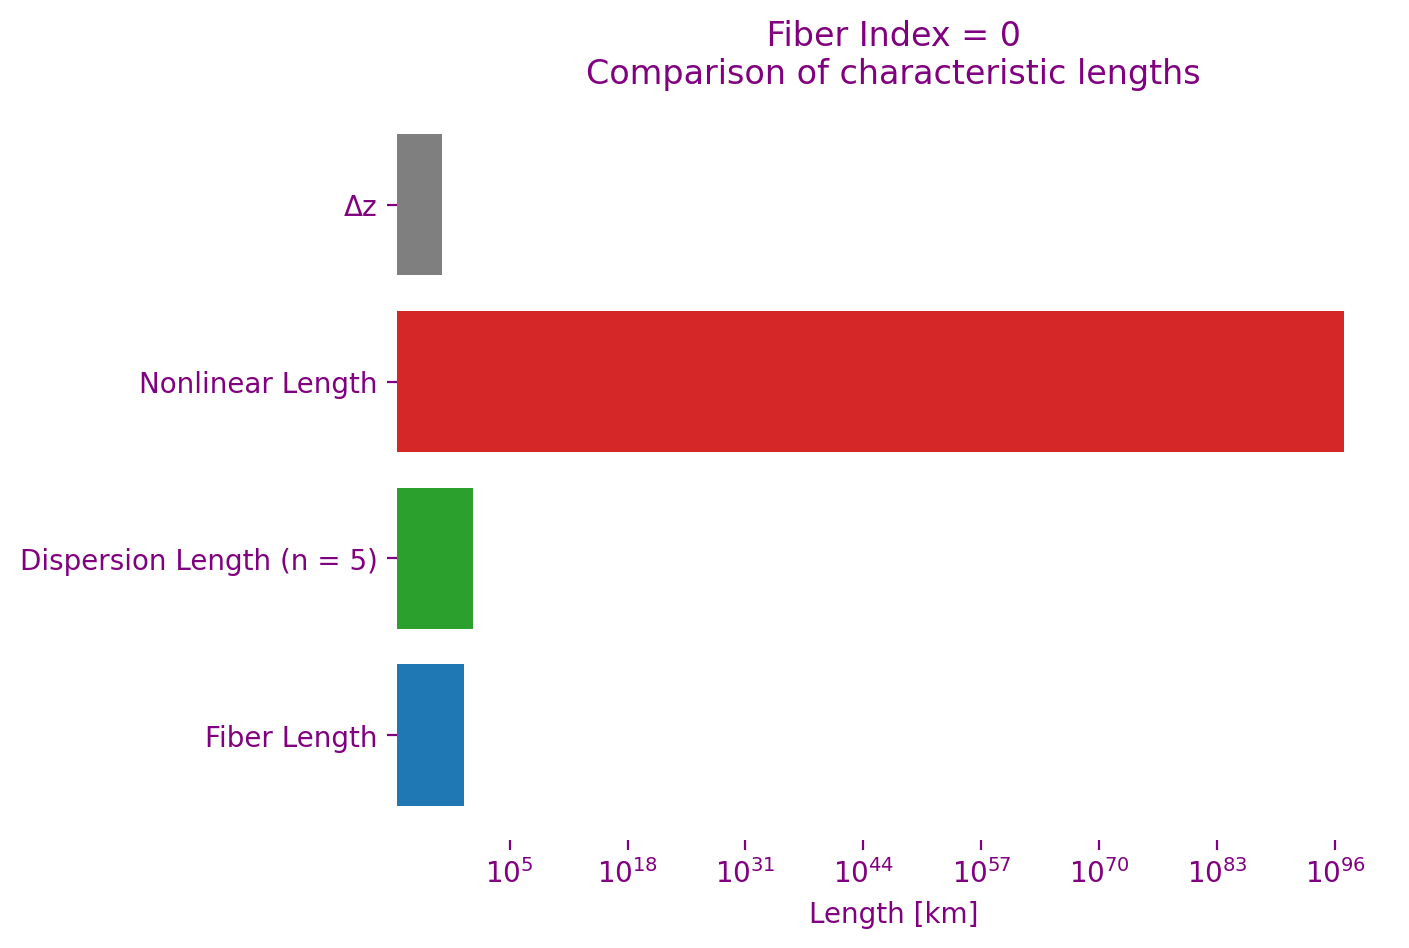

Running SSFM with 256 steps
SSFM progress through fiber number 1 = 10.00%
SSFM progress through fiber number 1 = 20.00%
SSFM progress through fiber number 1 = 30.00%
SSFM progress through fiber number 1 = 40.00%
SSFM progress through fiber number 1 = 50.00%
SSFM progress through fiber number 1 = 60.00%
SSFM progress through fiber number 1 = 70.00%
SSFM progress through fiber number 1 = 80.00%
SSFM progress through fiber number 1 = 90.00%
Finished running SSFM!!!


In [17]:

beta_list = [0,0,0,1e-12*1e-24*1e-11*1e-12] #Dispersion in units of s^(entry+2)/m    


#  Initialize fiber
fiber_beta4 = fiber_class(1000, 2**8, 0,   beta_list,    0  )


fiber_list_beta4 = [fiber_beta4]
fiber_span_beta4 = fiber_span_class(fiber_list_beta4)

testSafetyFactor = 10
testStepConfig=("fixed",2**11,testSafetyFactor)

expName="beta5"
#Run SSFM
ssfm_result_list = SSFM(fiber_span_beta4,testInputSignal,
                        # stepConfig=testStepConfig,
                        experimentName=expName,showProgressFlag=True)


#Plot pulses
nrange_test_pulse=9600
cutoff_test_pulse=-60

#Plot pulses
nrange_test_spectrum=200
cutoff_test_spectrum=-60


# Plot everything

number_of_fibers = 1
number_of_fibers = 1


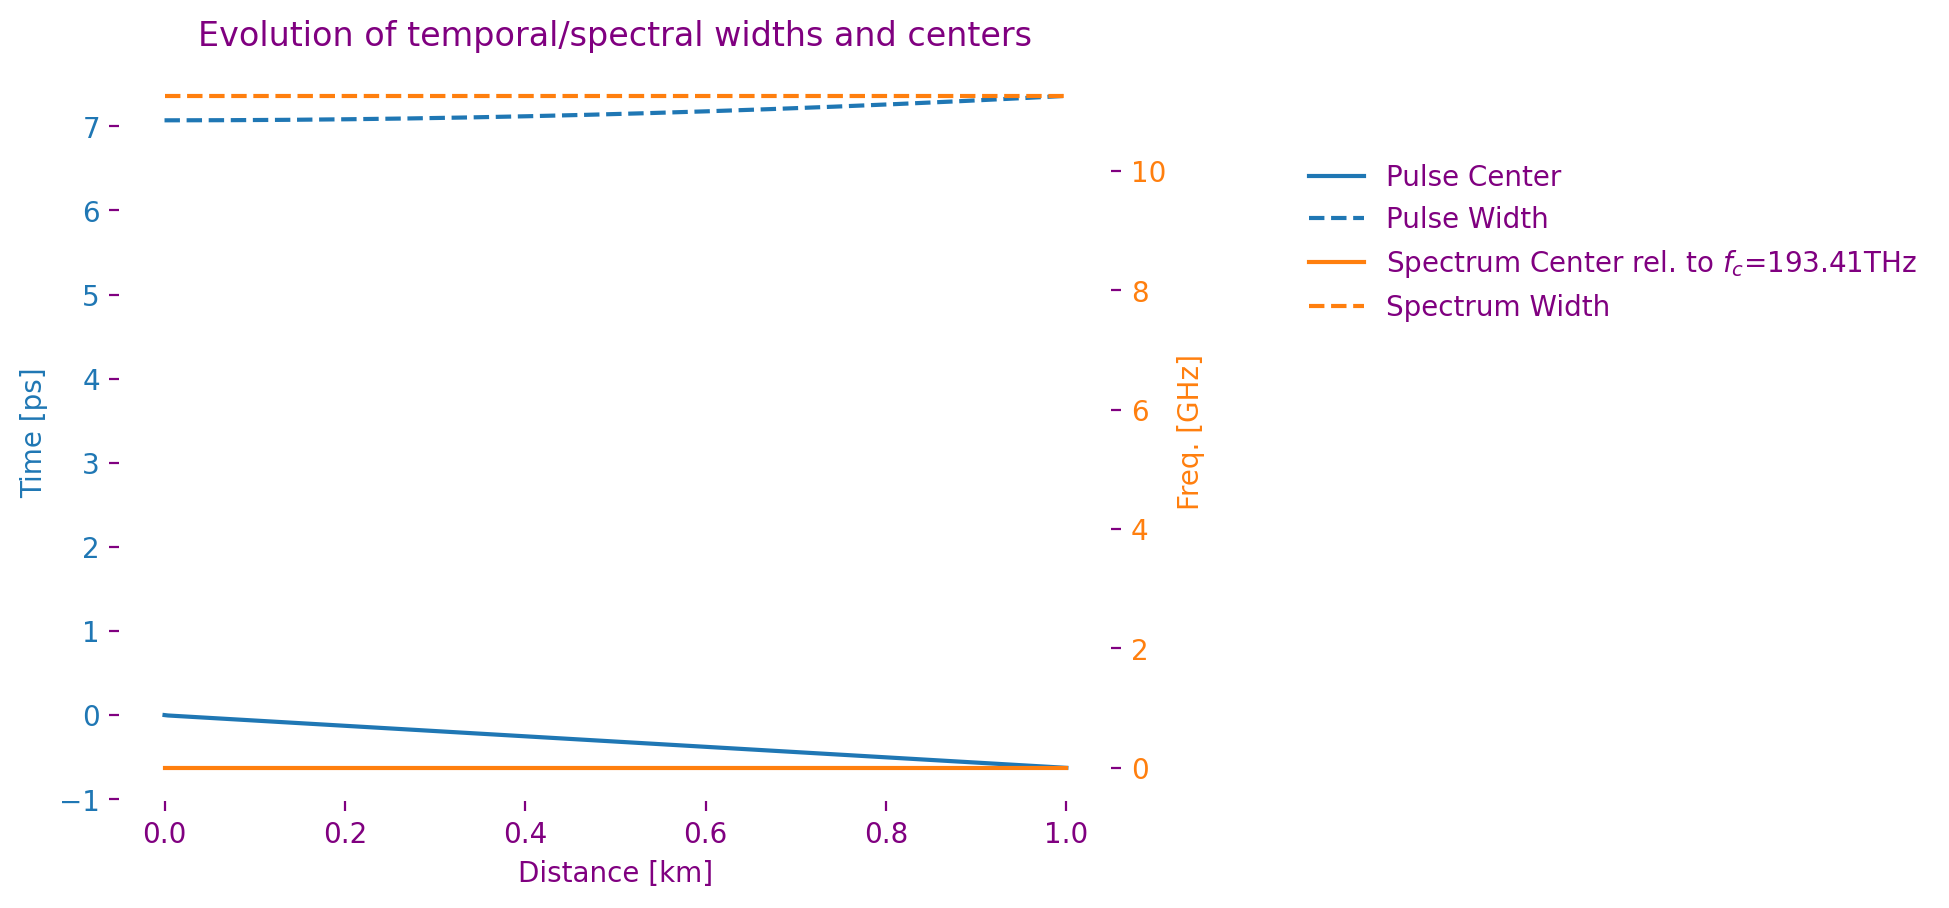

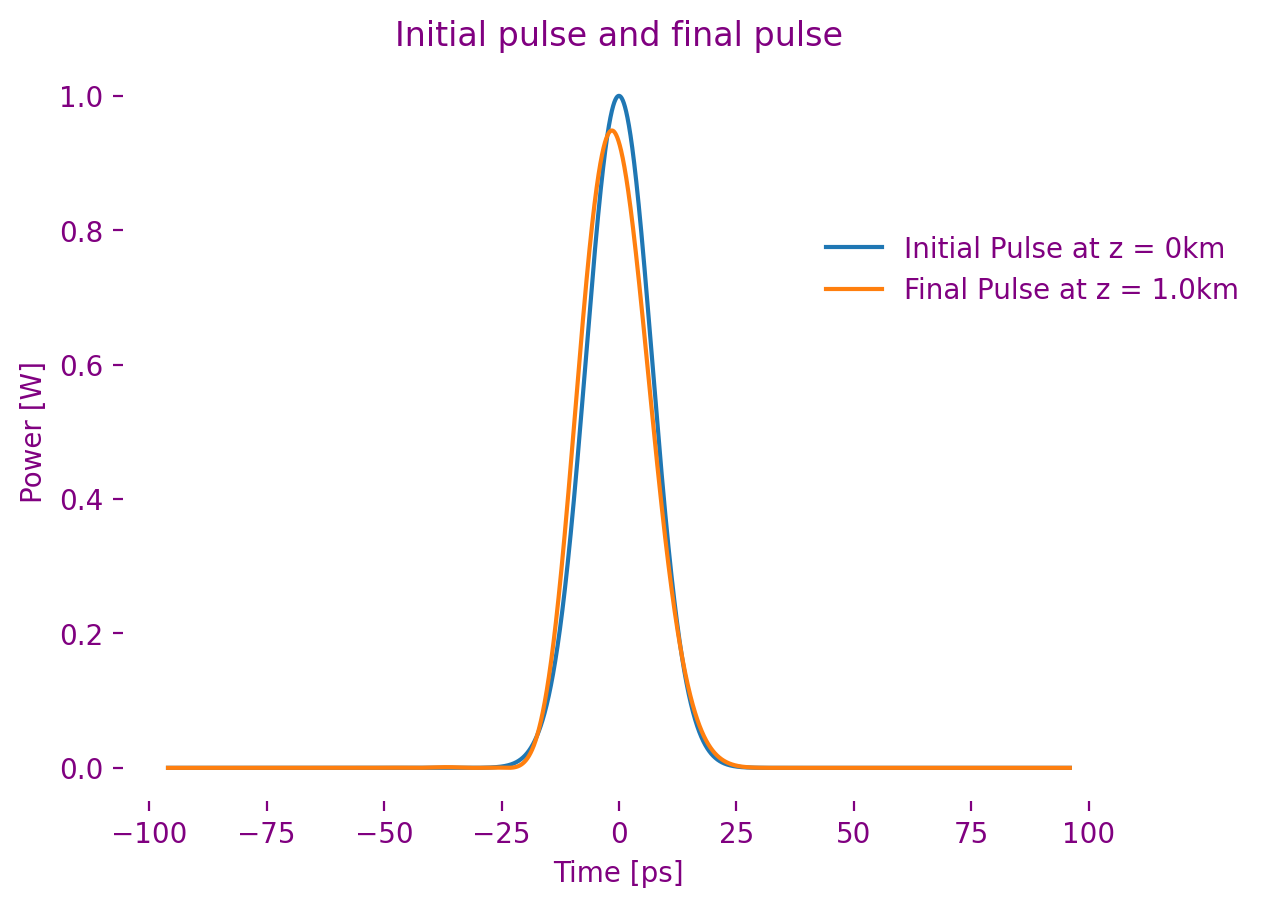

length of zvals = 257
number_of_fibers = 1


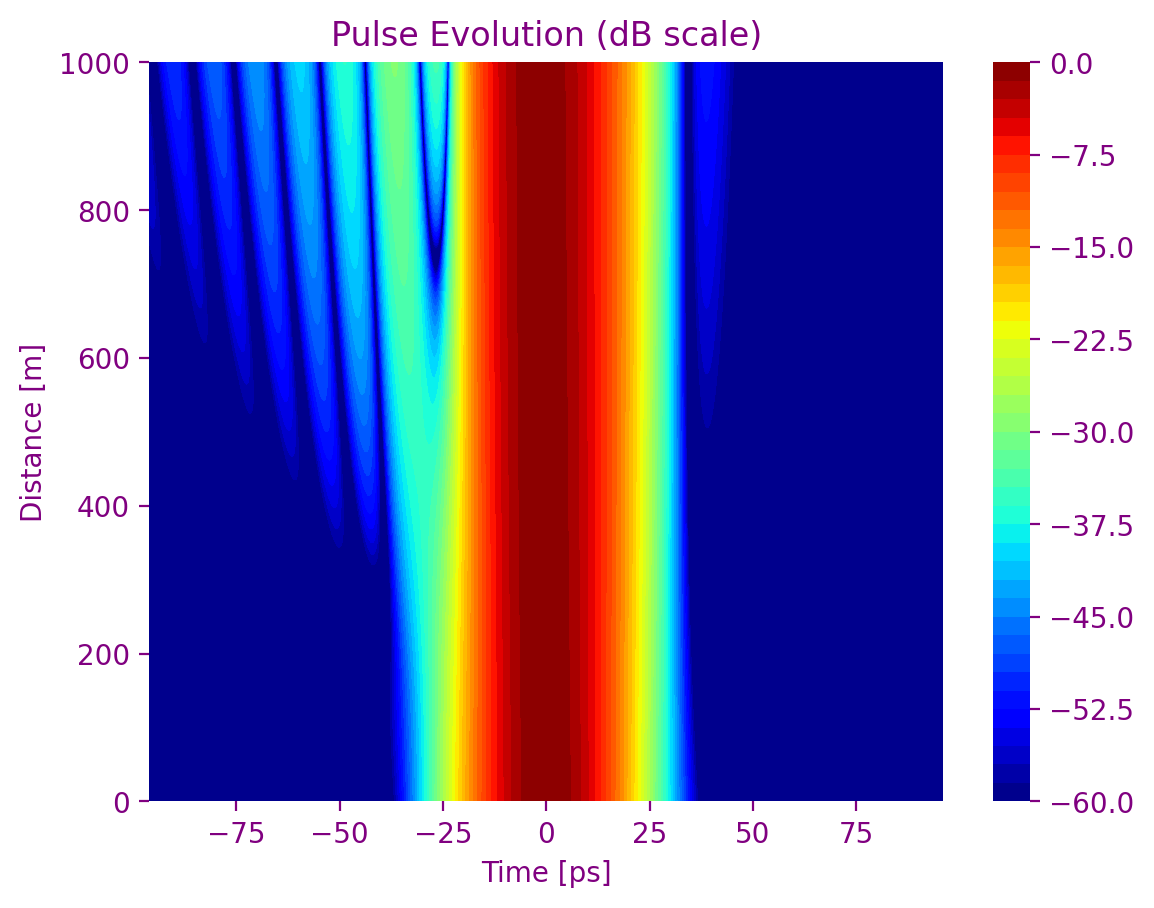

number_of_fibers = 1


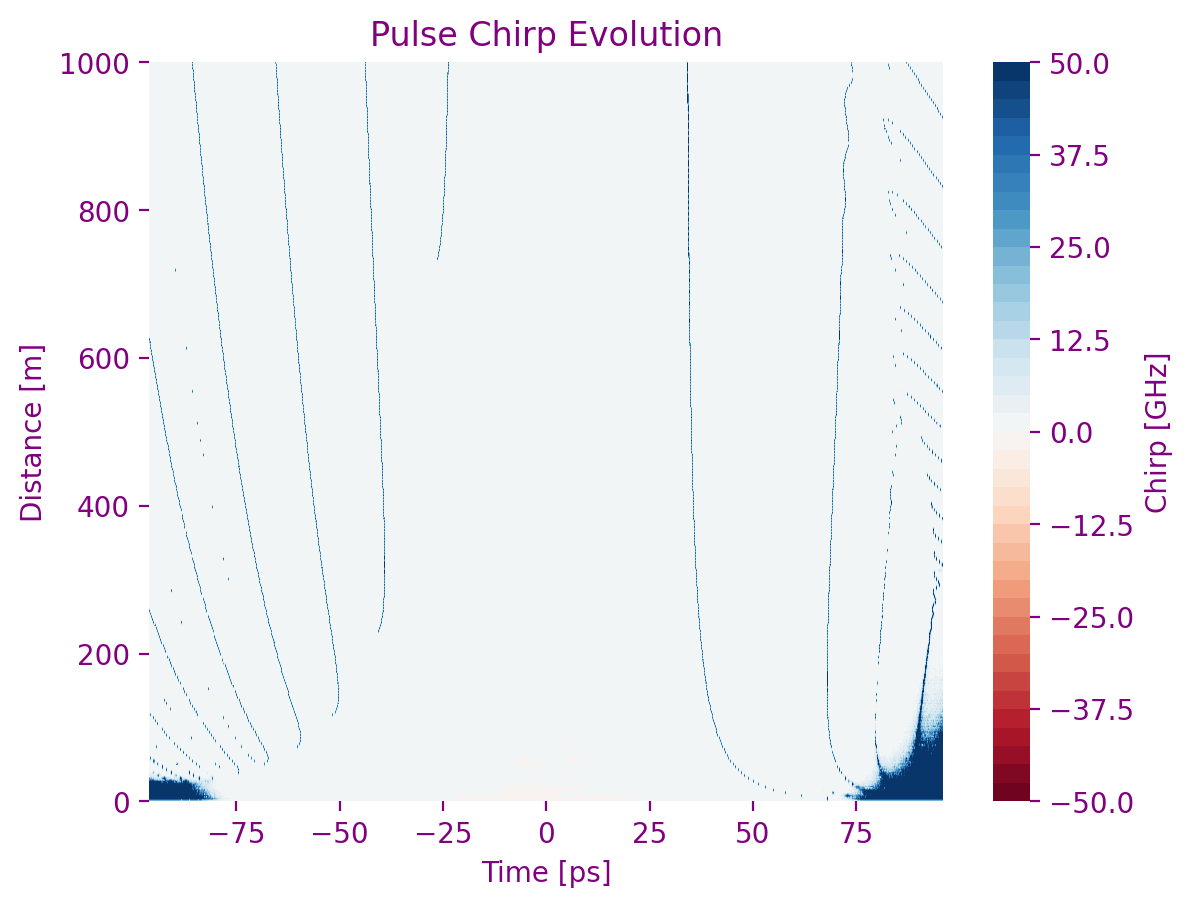

number_of_fibers = 1


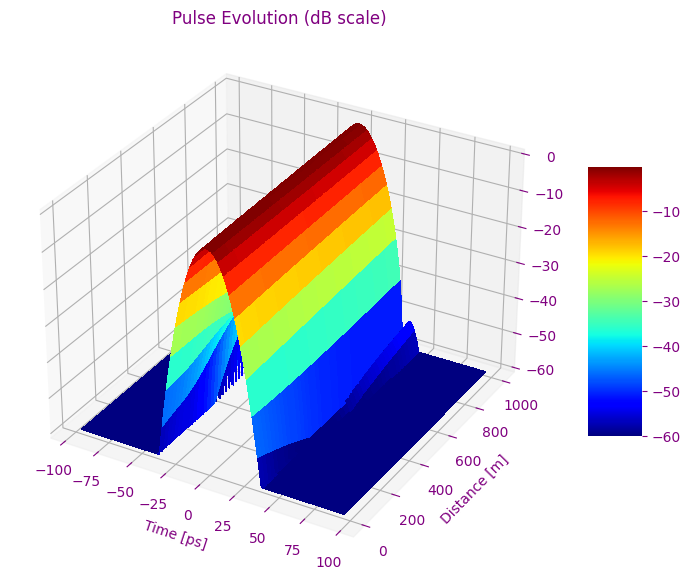

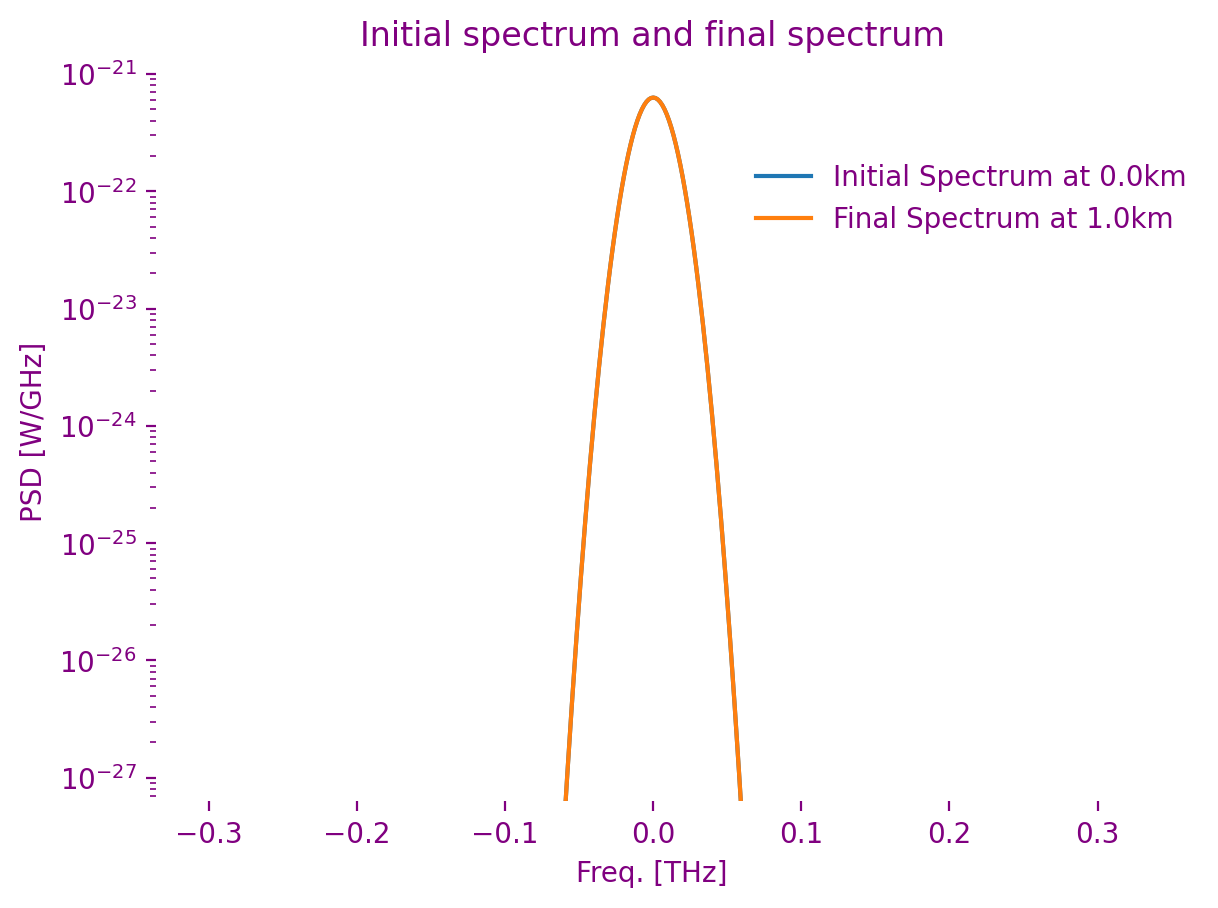

number_of_fibers = 1


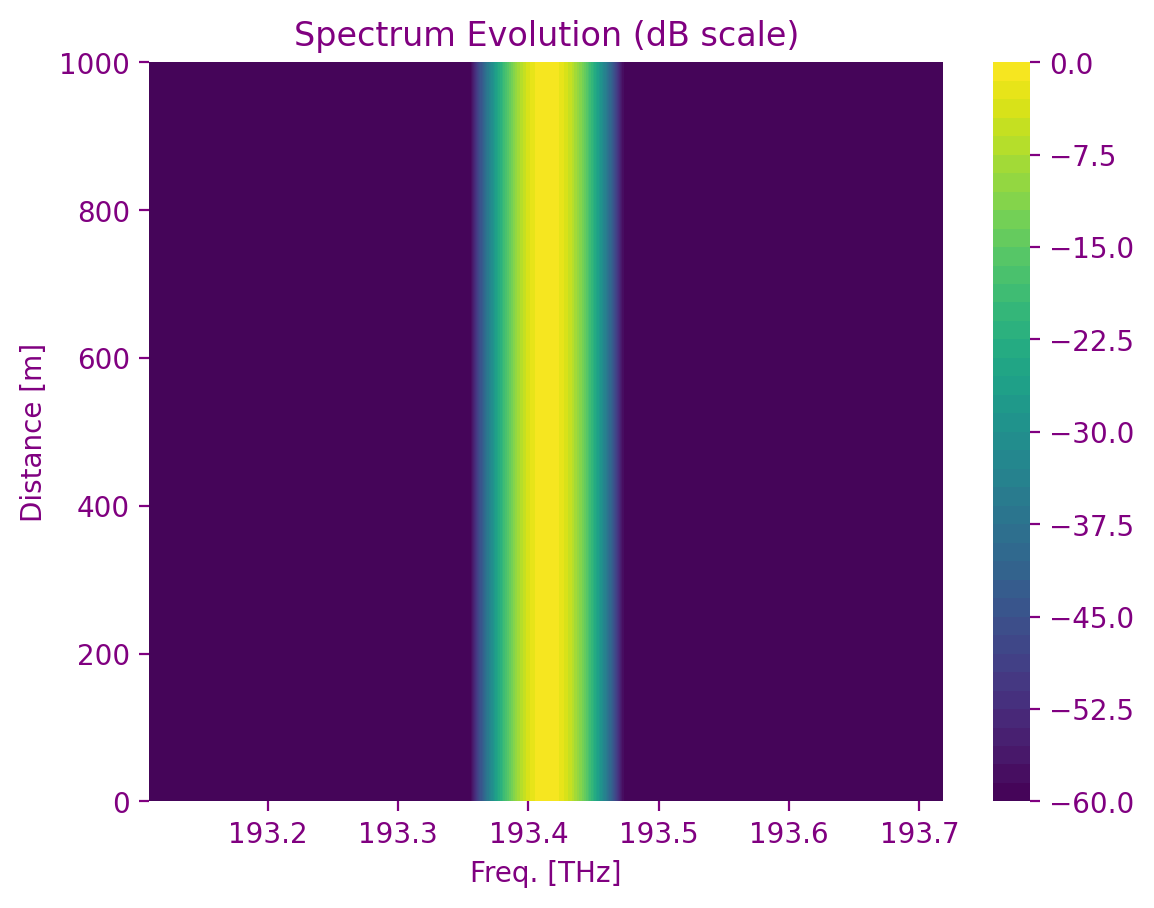

number_of_fibers = 1


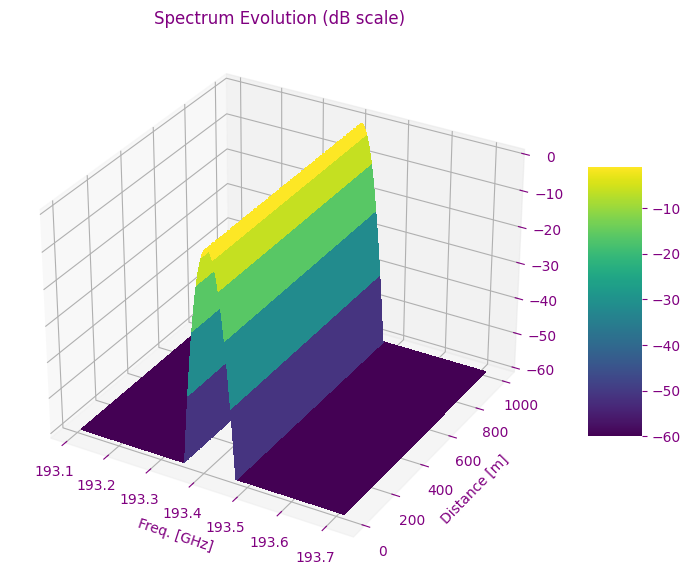

In [18]:

plotEverythingAboutResult(ssfm_result_list,
                          nrange_test_pulse,
                          cutoff_test_pulse,
                          nrange_test_spectrum,
                          cutoff_test_spectrum,
                          )


# Gif of 5th order dispersion

Making .gif anination of pulse evolution. This may take a while, so please be patient.
The .gif animation will be saved in F:\GitHub\Repository\Dispersion\HighOrderDispersion\Dispersion5\Simulation Results\beta5\2023_5_6_14_17_41
number_of_fibers = 1


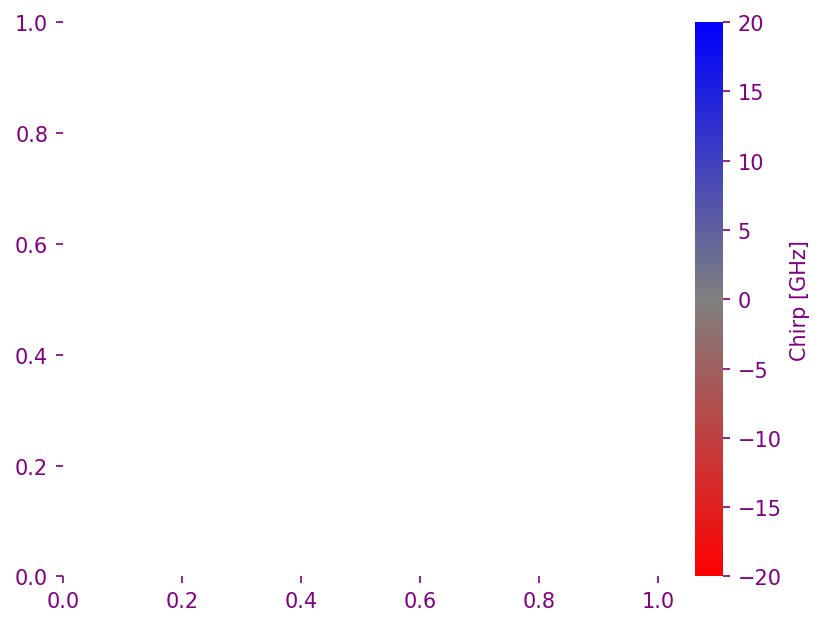

In [19]:
makeChirpGif(ssfm_result_list,nrange_test_pulse,chirpRange=[-20,20],framerate=15)